<a href="https://colab.research.google.com/github/hanafimajidd/api/blob/main/TPOT_Multioutput_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from tpot import TPOTRegressor
import pandas as pd

In [12]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=5000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

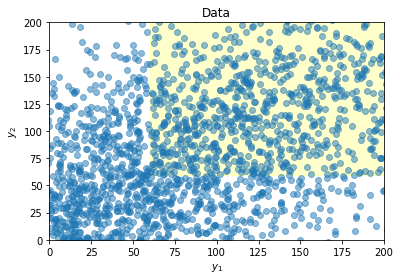

In [8]:
fig, ax = plt.subplots()
ax.set_title('Data')
ax.plot(Y[:, 0], Y[:, 1], 'o', alpha=0.5)
ax.add_patch(plt.Rectangle((60, 60), 140, 140, color='yellow', alpha=0.2))
ax.set_xlim(0, 200); ax.set_ylim(0, 200)
ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$');

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.5)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.24774647606135264

Generation 2 - Current best internal CV score: -0.24774647606135264

Generation 3 - Current best internal CV score: -0.24774647606135264

Generation 4 - Current best internal CV score: -0.24774647606135264

Generation 5 - Current best internal CV score: -0.24774647606135264

Best pipeline: LassoLarsCV(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=1, min_child_weight=2, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.45, verbosity=0), normalize=False)


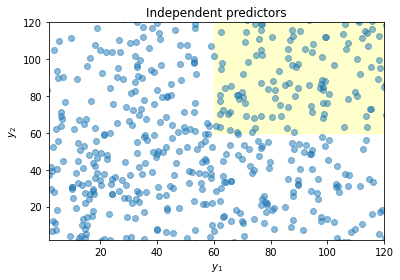

In [10]:
from tpot import TPOTRegressor

from sklearn.ensemble import *
clf_0 = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42).fit(Xtrain,Ytrain[:,0])
#clf_0 = LinearSVR(max_iter=500000).fit(Xtrain, Ytrain[:,0])
clf_1 = LinearSVR(max_iter=500000).fit(Xtrain, Ytrain[:,1])
Ypred_0 = clf_0.predict(Xtest)
Ypred_1 = clf_1.predict(Xtest)

fig, ax = plt.subplots()
ax.set_title('Independent predictors')
ax.plot(Ypred_0, Ypred_1, 'o', alpha=0.5)
ax.add_patch(plt.Rectangle((60, 60), 140, 140, color='yellow', alpha=0.2))
ax.set_xlim(2, 120); ax.set_ylim(2, 120)
ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$');

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


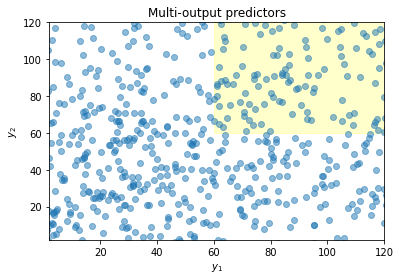

In [24]:
from sklearn.ensemble import *
from tpot import TPOTRegressor
#clf1 = GradientBoostingRegressor(loss= "squared_error", learning_rate = 0.1, n_estimators= 100, subsample=1, criterion= "friedman_mse", min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0, max_depth = 3, min_impurity_decrease= 0, random_state=39).fit(Xtrain,Ytrain)
#clf1 = ExtraTreesRegressor(n_estimators=100, criterion='squared_error',max_features='auto',random_state=39).fit(Xtrain, Ytrain)
clf1 = RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=1, random_state=39, verbose=2, warm_start=False, ccp_alpha=0.0, max_samples=None).fit(Xtrain,Ytrain)
#clf1 = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42).fit(Xtrain,Ytrain)
#clf1 = LinearSVR().fit(Xtrain,Ytrain)
Ypred1 = clf1.predict(Xtest)
fig, ax = plt.subplots()
ax.set_title('Multi-output predictors')
ax.plot(Ypred1[:, 0], Ypred1[:, 1], 'o', alpha=0.5)
ax.add_patch(plt.Rectangle((60, 60), 140, 140, color='yellow', alpha=0.2))
ax.set_xlim(2, 120); ax.set_ylim(2, 120)
ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$');

In [25]:
Y.shape[1]

2

In [26]:
from sklearn.svm import LinearSVR
class MultiOutputGB(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, Y):
        X, Y = map(np.atleast_2d, (X, Y))
        assert X.shape[0] == Y.shape[0]
        Ny = Y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=100, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=5)
            Xi = np.hstack([X, Y[:, :i]])
            yi = Y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        Y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            Y[:, i] = clf.predict(np.hstack([X, Y[:, :i]]))
        return Y

In [27]:
clf2 = MultiOutputGB(100).fit(Xtrain, Ytrain)
Ypred2 = clf2.predict(Xtest)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.2481265419581468

Generation 2 - Current best internal CV score: -0.2481265419581468

Generation 3 - Current best internal CV score: -0.24781826867998377

Generation 4 - Current best internal CV score: -0.24781826867998377

Generation 5 - Current best internal CV score: -0.24780038137336047

Best pipeline: LassoLarsCV(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=19, min_samples_split=9, n_estimators=100), normalize=True)


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.2571846646527574

Generation 2 - Current best internal CV score: -0.25718466465264134

Generation 3 - Current best internal CV score: -0.2571846646526364

Generation 4 - Current best internal CV score: -0.2570303289599895

Generation 5 - Current best internal CV score: -0.2570303289599895

Best pipeline: LassoLarsCV(StandardScaler(AdaBoostRegressor(MinMaxScaler(input_matrix), learning_rate=0.01, loss=square, n_estimators=100)), normalize=True)


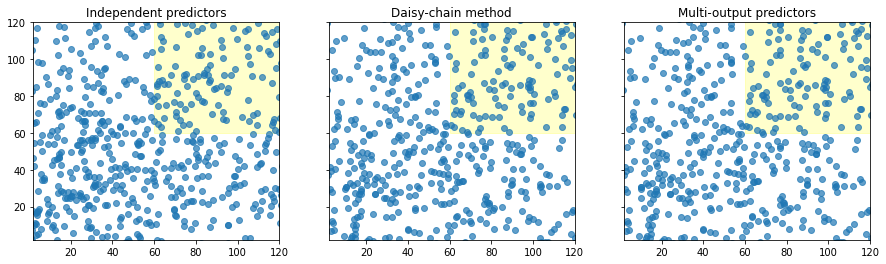

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
    
ax[0].plot(Ypred1[:, 0], Ypred1[:, 1], 'o', alpha=0.7)
ax[1].plot(Ypred2[:, 0], Ypred2[:, 1], 'o', alpha=0.7)
ax[2].plot(Ypred_0, Ypred_1, 'o', alpha=0.7)

ax[0].set_title("Independent predictors")
ax[1].set_title("Daisy-chain method")
ax[2].set_title("Multi-output predictors")

for axi in ax:
    axi.add_patch(plt.Rectangle((60, 60), 140, 140, color='yellow', alpha=0.2))
    axi.set_xlim(2, 120)
    axi.set_ylim(2, 120)

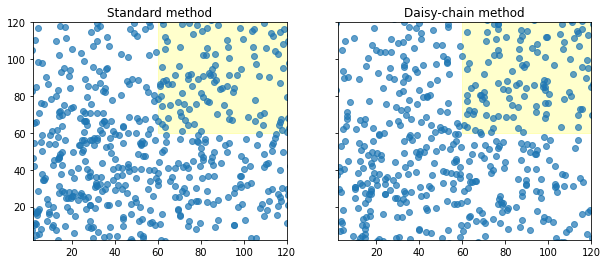

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
    
ax[0].plot(Ypred1[:, 0], Ypred1[:, 1], 'o', alpha=0.7)
ax[1].plot(Ypred2[:, 0], Ypred2[:, 1], 'o', alpha=0.7)

ax[0].set_title("Standard method")
ax[1].set_title("Daisy-chain method")

for axi in ax:
    axi.add_patch(plt.Rectangle((60, 60), 140, 140, color='yellow', alpha=0.2))
    axi.set_xlim(2, 120)
    axi.set_ylim(2, 120)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(Ytest, Ypred1))
RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred1 is',RMSE)
print('RMSE for Ypred2 is',RMSE2)

RMSE for Ypred1 is 26.817957480277627
RMSE for Ypred2 is 0.5054305400478372
